In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import the dataset with ranking features merged
df = pd.read_csv('bik_pub_landslide_ranking.csv')

In [3]:
# Count ranking condition
has_ranking = df['World Rank'].count()
no_ranking = 214 - has_ranking

In [4]:
# Generate a dataframe for the ranking condition
ranking = pd.DataFrame(columns=["Has Ranking", "No Ranking"], data=[[has_ranking, no_ranking]])
ranking

,Has Ranking,No Ranking
0,65,149


[Text(0, 0, '65'), Text(0, 0, '149')]

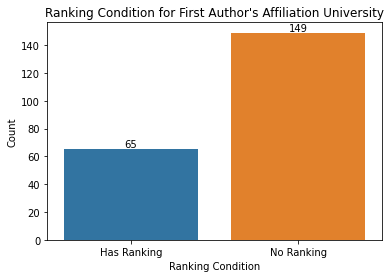

In [5]:
# Generate a barplot for the ranking condition
ax1 = sns.barplot(data = ranking)
ax1.set_title("Ranking Condition for First Author's Affiliation University")
ax1.set_xlabel('Ranking Condition')
ax1.set_ylabel('Count')
ax1.bar_label(ax1.containers[0])

In [6]:
# Generate a dataframe for ranked universities only
ranked_univ = df[['University', 'World Rank', 'Teaching', 'Research']]
ranked_univ = ranked_univ[ranked_univ['World Rank'].notnull()].reset_index(drop = True)


In [7]:
# Manually sort on rankings
def sort(column):
    reorder = ['4', '7', '9', '11', '16', '17', '20', '24', '31', '34', '35', '44', '46', '47', '52', '53', '54',
               '76', '87', '98', '104', '106', '110', '134', '147', '148', '156', '158', '162', '176', '201-225', 
               '226-250', '251-275', '276-300', '301-350', '351-400']
    cat = pd.Categorical(column, categories = reorder, ordered = True)
    return pd.Series(cat)

sorted_ranking = ranked_univ.sort_values(by = "World Rank", key = sort).reset_index(drop = True)


In [8]:
# Count # of problematic papers for each ranked university
count_paper = sorted_ranking['University'].value_counts()
count_paper = pd.DataFrame(count_paper).reset_index()
count_paper = count_paper.rename(columns = {'index':'University', 'University':'# of Problematic Papers'})


In [9]:
# Merge number of problematic paper to ranked universities
sorted_ranking = sorted_ranking.drop_duplicates().reset_index(drop = True)
merge = pd.merge(sorted_ranking, count_paper, on='University', how='left')

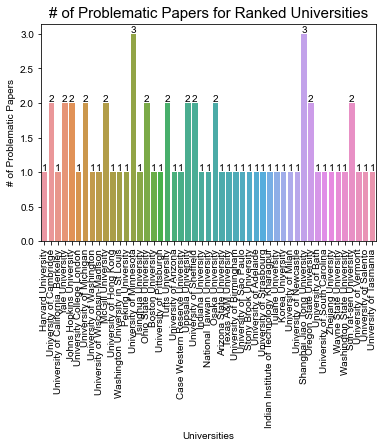

In [10]:
# Generate a barplot between ranked universities and number of problematic papers
ax2 = sns.barplot(x = 'University', y = '# of Problematic Papers', data = merge)
ax2.set_title("# of Problematic Papers for Ranked Universities", fontsize = 15)
ax2.set_xlabel('Universities')
ax2.set_ylabel('# of Problematic Papers')
ax2.bar_label(ax2.containers[0])

sns.set(rc = {'figure.figsize':(20,20)})
plt.xticks(rotation=90, horizontalalignment="center")
plt.show()

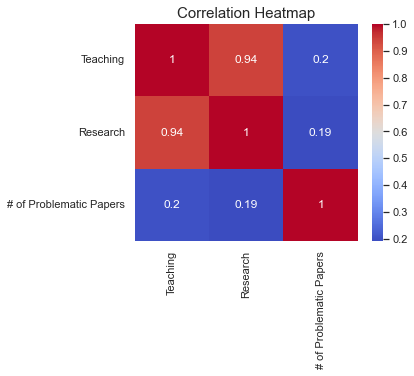

In [11]:
# Generate a heatmap between teaching/research and number of problematic papers
correlation = merge.corr()
plt.figure(figsize=(5, 4))
plt.title('Correlation Heatmap', fontsize = 15)
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
plt.show()